# **Prediction Of Diabetes Empowered With Fused Machine Learning**

# **Importing necessary libraries and loading the data**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [7]:
df=pd.read_csv(r'pima-data.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


The dataset appears to be related to diabetes health indicators. Here's an initial overview based on the first few rows:

1. **num_preg**: Number of pregnancies.
2. **glucose_conc**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. **diastolic_bp**: Diastolic blood pressure (mm Hg).
4. **thickness**: Triceps skinfold thickness (mm).
5. **insulin**: 2-Hour serum insulin (mu U/ml).
6. **bmi**: Body mass index (weight in kg/(height in m)^2).
7. **diab_pred**: Diabetes pedigree function.
8. **age**: Age (years).
9. **skin**: Triceps skin fold thickness (mm). This seems to be a calculated field similar to 'thickness'.
10. **diabetes**: Class variable (True or False) indicating if the person was diagnosed with diabetes.

In [8]:
#Let's print the first 5 records of the data set
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [9]:
#Let's print the last 5 records of the dataset
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [10]:
#Let's print the column name
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [11]:
# shape of the dataset
df.shape

(768, 10)

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [13]:
#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [14]:
#Let's print the unique values in our dataset
df.nunique()

num_preg         17
glucose_conc    136
diastolic_bp     47
thickness        51
insulin         186
bmi             248
diab_pred       517
age              52
skin             51
diabetes          2
dtype: int64

In [15]:
#Let's print the data types in our data
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [16]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
0        0.627   50  1.3790      True  
1        0.351   31  1.1426     F

In [17]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [18]:
#Let's check the total number of null values present in our dataset
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

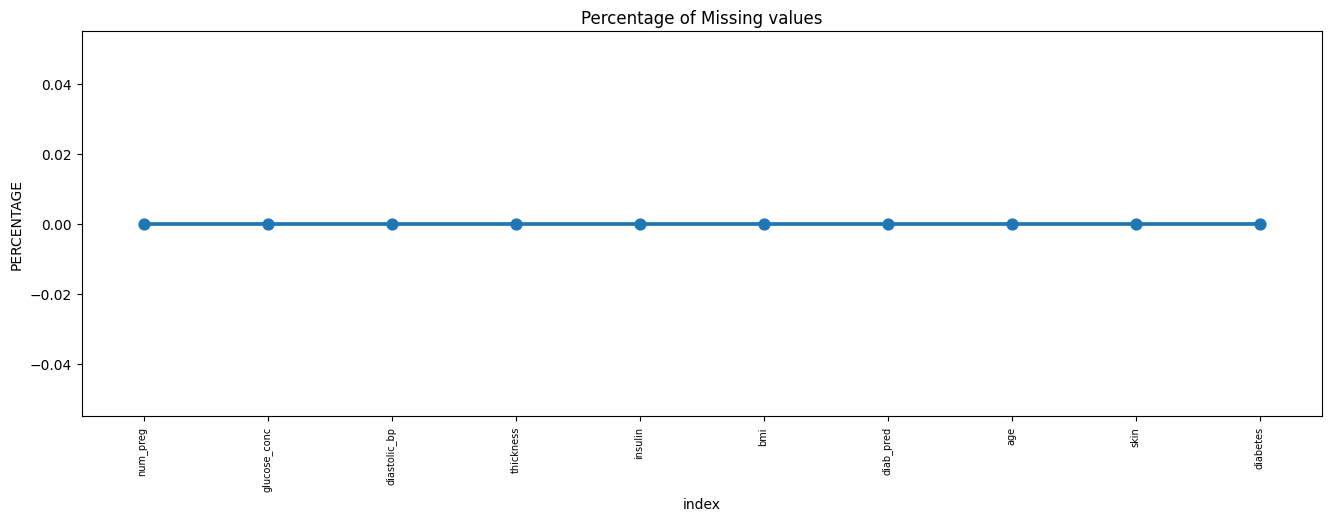

In [19]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

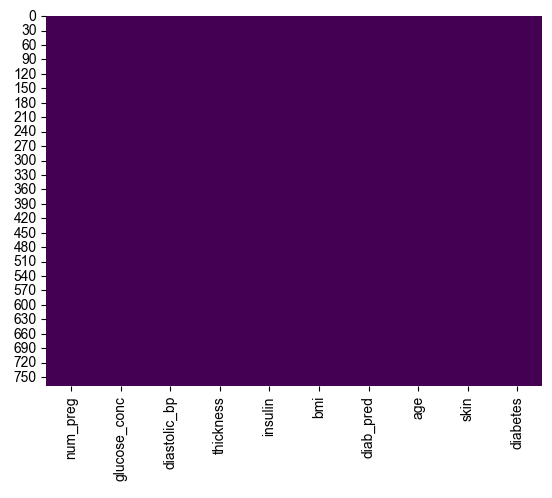

In [20]:
# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

CORRELATION:
A correlation heatmap is a graphical representation that showcases the correlation between variables in a dataset. It uses colors to indicate the strength and direction of the relationships between pairs of variables. The heatmap is constructed by calculating the correlation coefficient between each variable pair and assigning a color gradient to represent the magnitude of correlation. Darker shades indicate stronger positive correlations, while lighter shades represent weaker or negative correlations. This visualization technique allows for a quick and intuitive understanding of the interdependencies and patterns within the dataset, aiding in identifying important relationships and potential insights.

(         num_preg  glucose_conc  diastolic_bp   thickness     insulin  \
 count  768.000000    768.000000    768.000000  768.000000  768.000000   
 mean     3.845052    120.894531     69.105469   20.536458   79.799479   
 std      3.369578     31.972618     19.355807   15.952218  115.244002   
 min      0.000000      0.000000      0.000000    0.000000    0.000000   
 25%      1.000000     99.000000     62.000000    0.000000    0.000000   
 50%      3.000000    117.000000     72.000000   23.000000   30.500000   
 75%      6.000000    140.250000     80.000000   32.000000  127.250000   
 max     17.000000    199.000000    122.000000   99.000000  846.000000   
 
               bmi   diab_pred         age        skin  
 count  768.000000  768.000000  768.000000  768.000000  
 mean    31.992578    0.471876   33.240885    0.809136  
 std      7.884160    0.331329   11.760232    0.628517  
 min      0.000000    0.078000   21.000000    0.000000  
 25%     27.300000    0.243750   24.000000    0

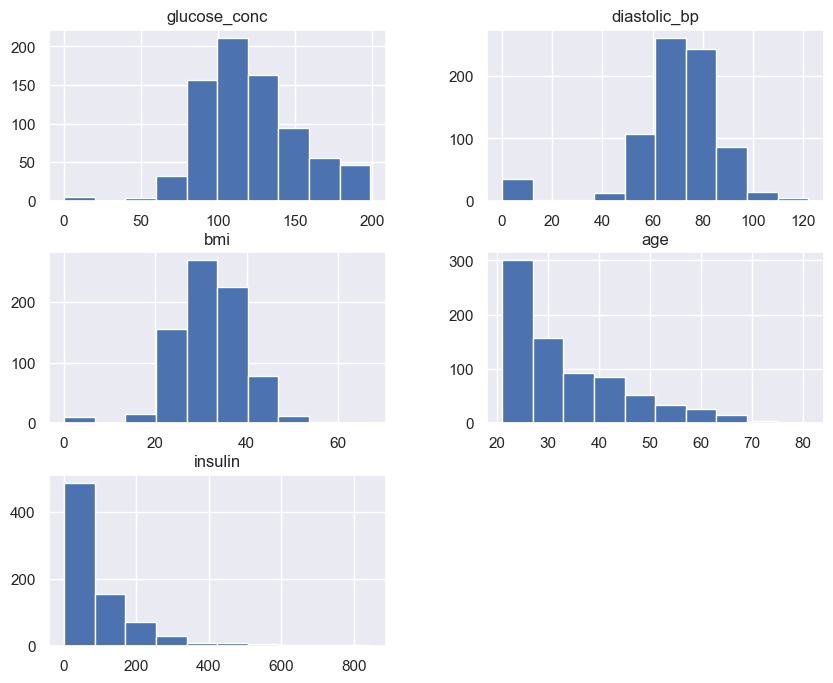

In [21]:
# Statistical Summary
statistical_summary = df.describe()
# Data Quality Check - Checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes
# Distribution Analysis - Checking the distribution of key numerical variables
distribution_analysis = df[['glucose_conc', 'diastolic_bp', 'bmi', 'age', 'insulin']].hist(figsize=(10, 8))
statistical_summary, missing_values, data_types

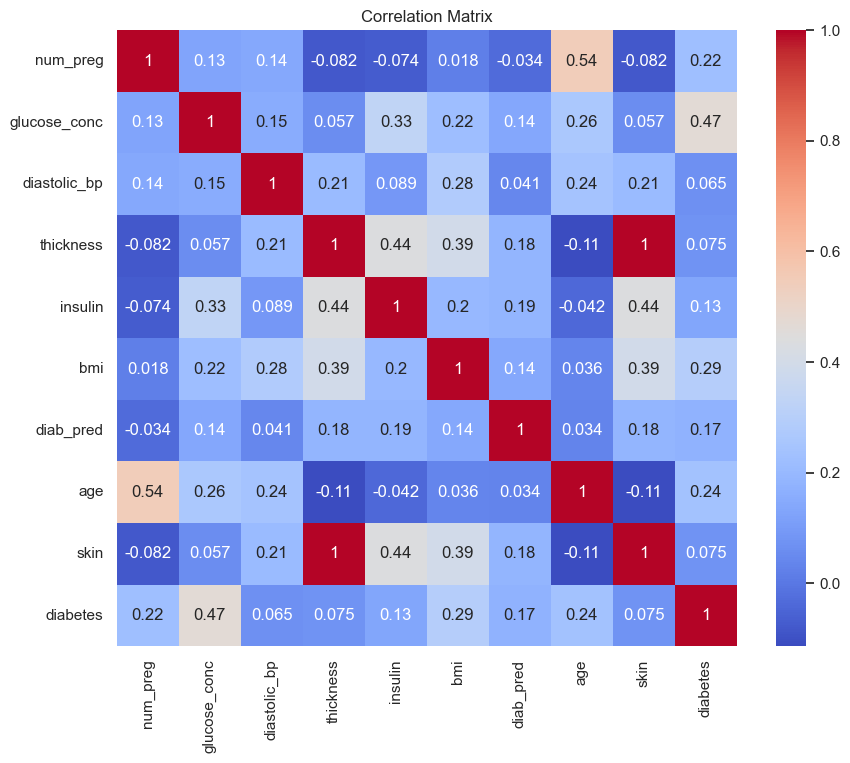

diabetes
False    65.104167
True     34.895833
Name: proportion, dtype: float64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Analysis
correlation_matrix = df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# Diabetes Prevalence Analysis
diabetes_prevalence = df['diabetes'].value_counts(normalize=True) * 100
diabetes_prevalence

In [23]:
df.value_counts('diabetes')

diabetes
False    500
True     268
Name: count, dtype: int64

# **BOXPLOT**

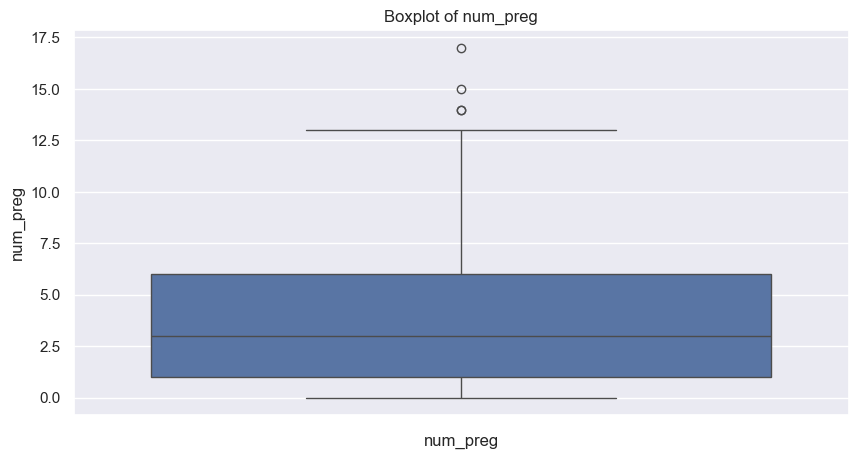

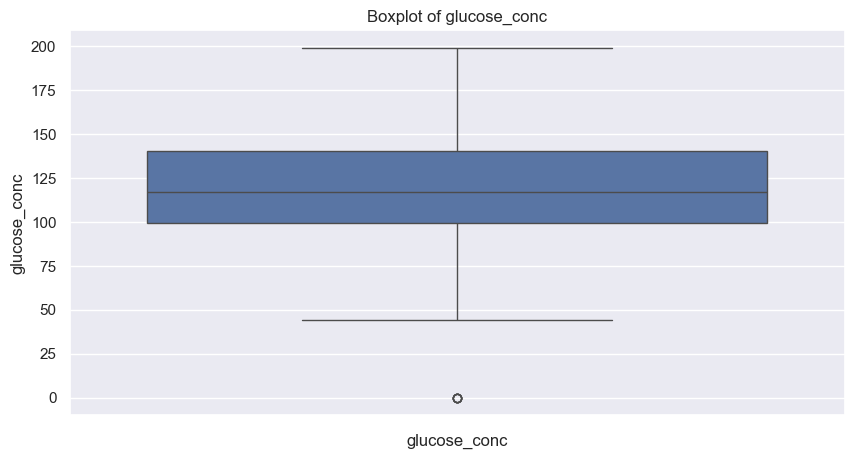

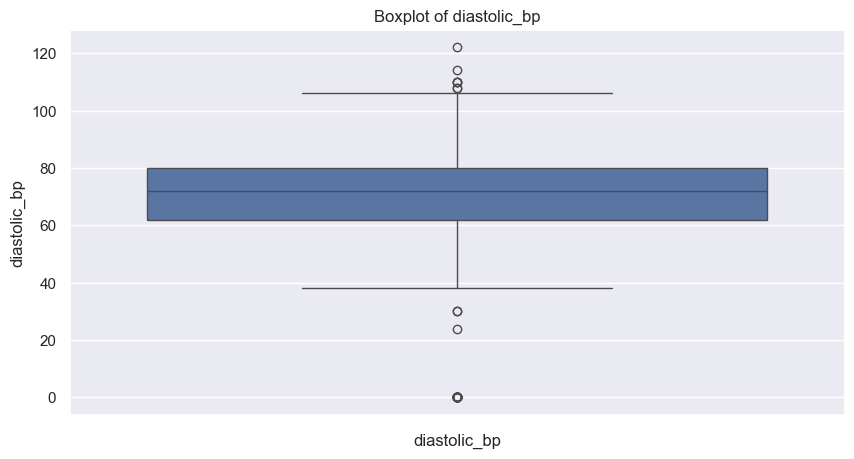

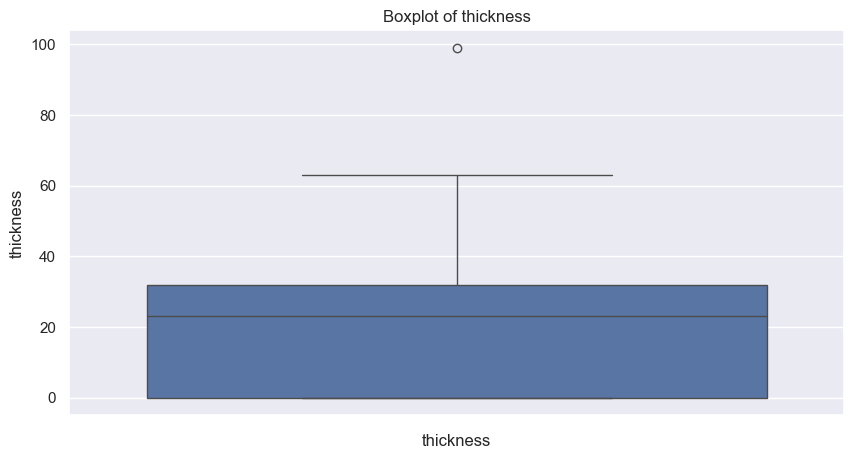

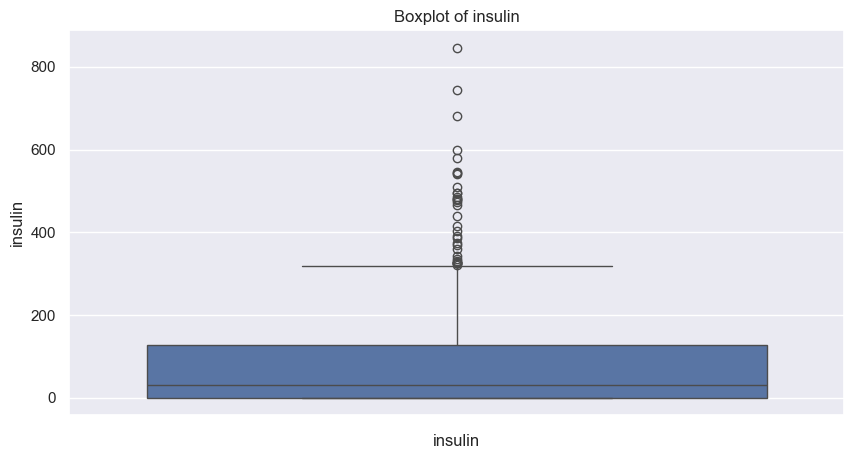

In [24]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **REMOVING OUTLIERS**

In [25]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **BOXPLOT**

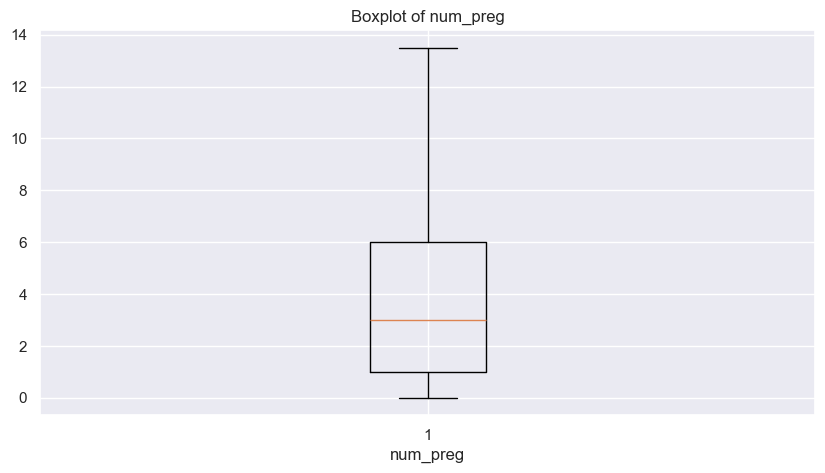

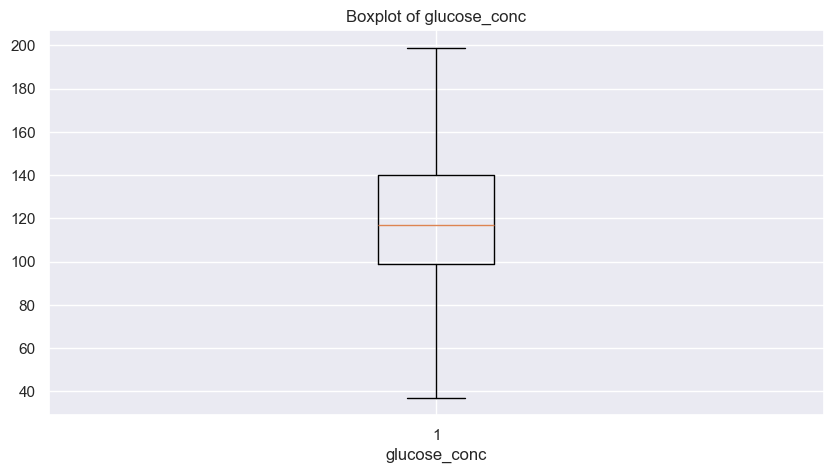

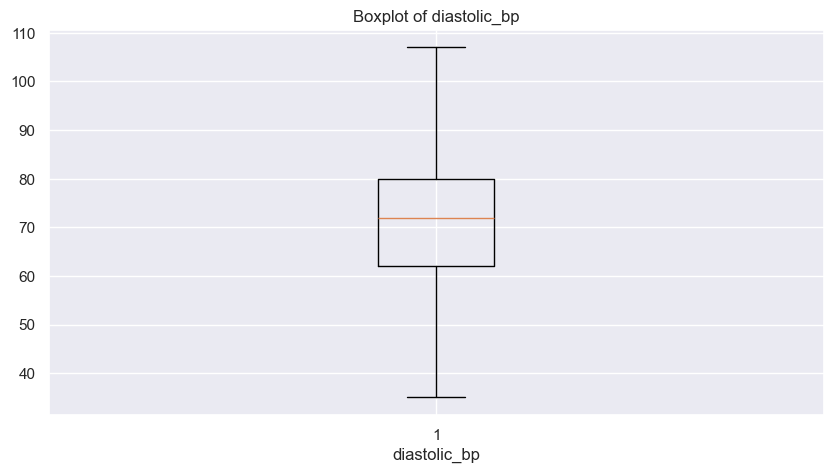

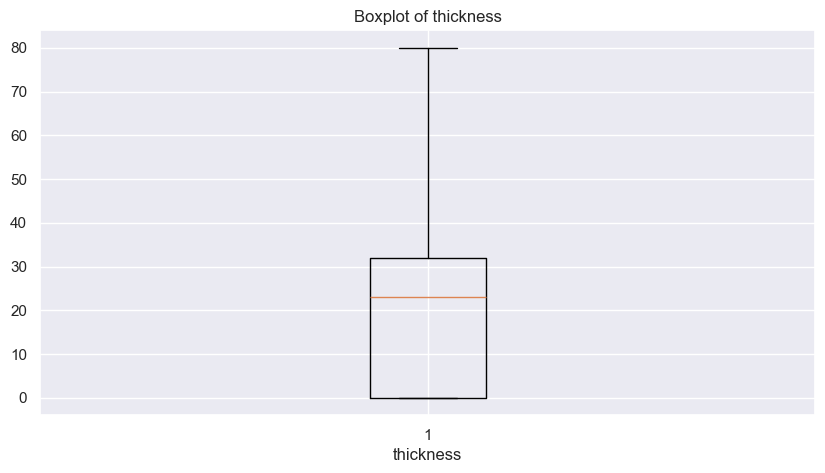

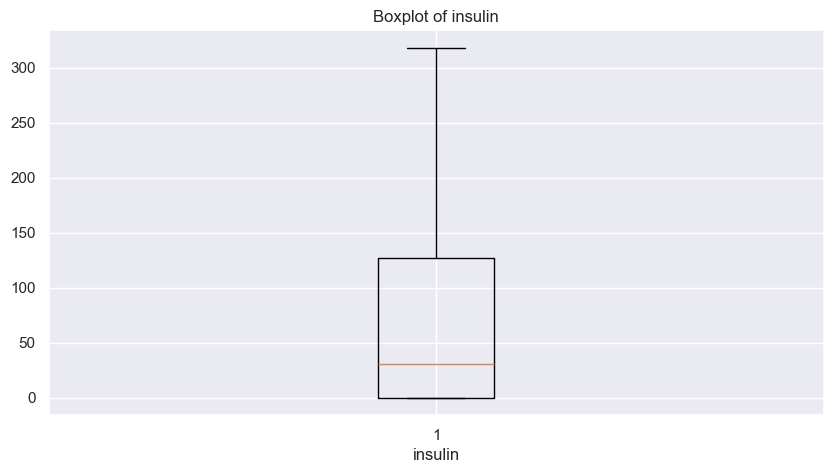

In [26]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **JOINTPLOT**

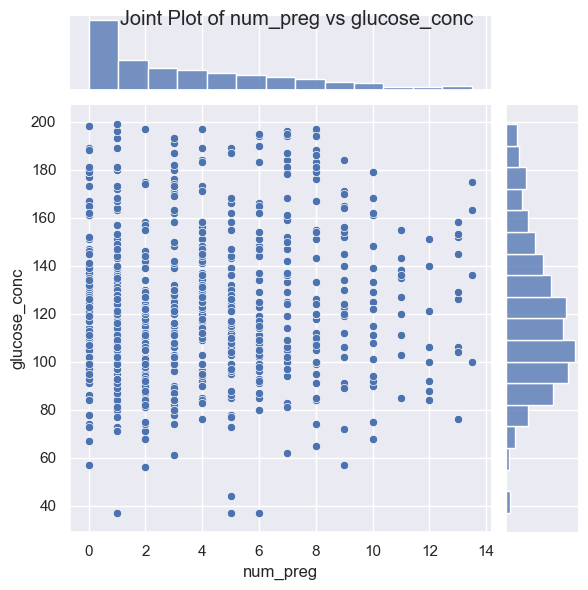

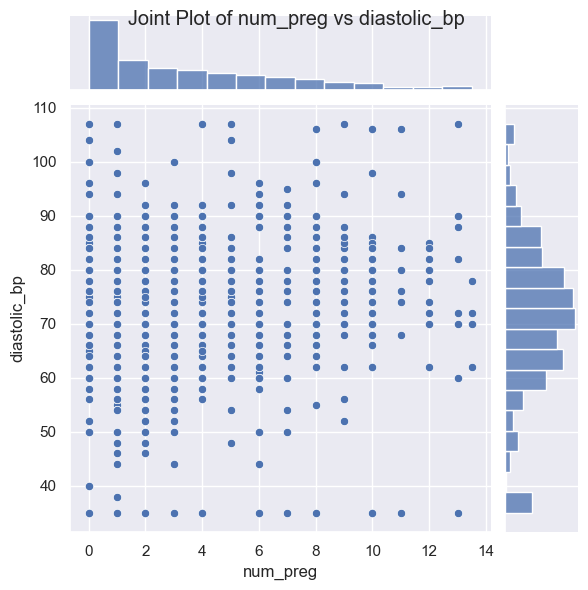

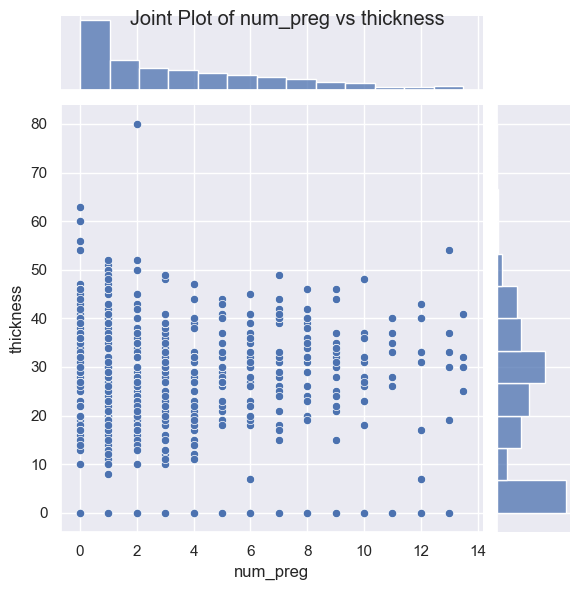

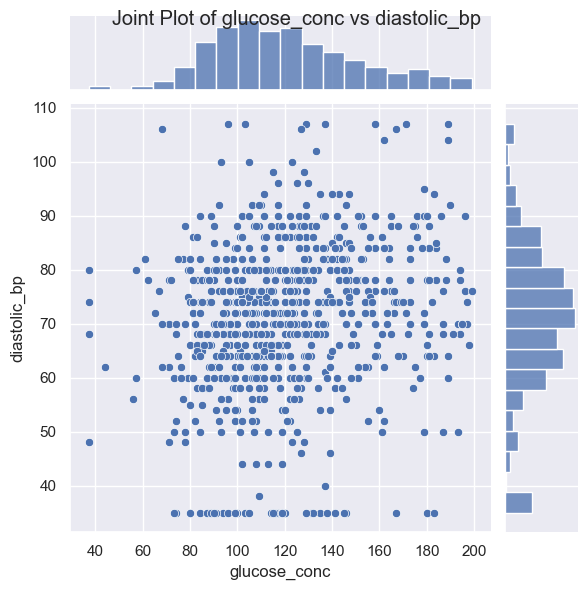

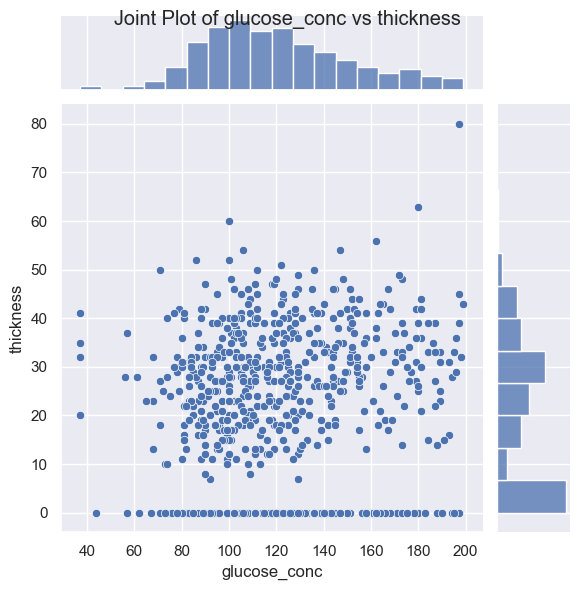

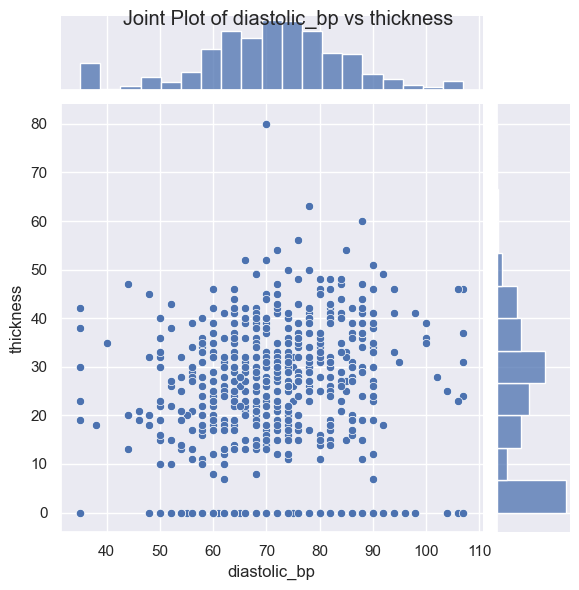

In [27]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create joint plots for each pair of numerical columns
for i in range(min(len(numerical_columns), 4)):  # Considering only the first five columns
    for j in range(i + 1, min(len(numerical_columns), 4)):  # Considering only the first five columns
        volume = numerical_columns[i]
        available_supply = numerical_columns[j]
        sns.jointplot(data=df, x=volume, y=available_supply, kind='scatter')
        plt.suptitle(f"Joint Plot of {volume} vs {available_supply}")
        plt.show()

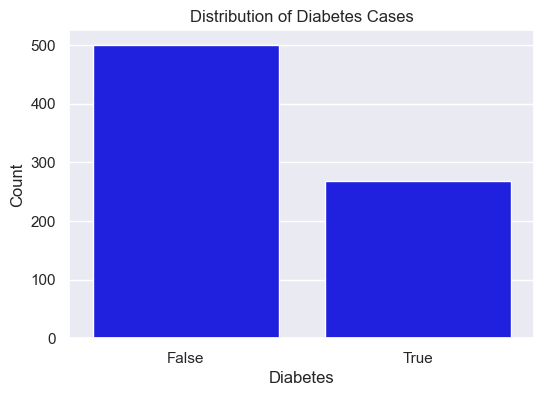

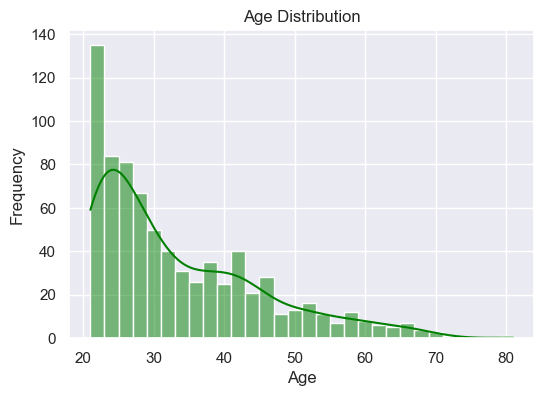

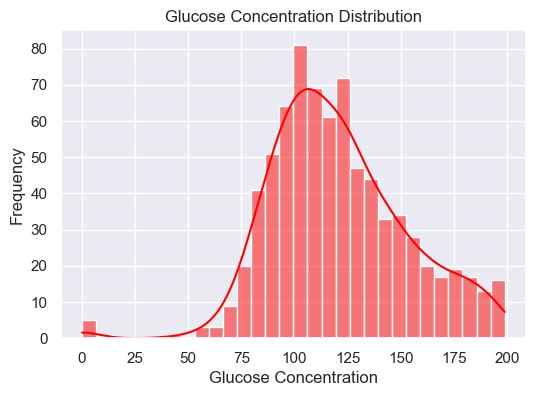

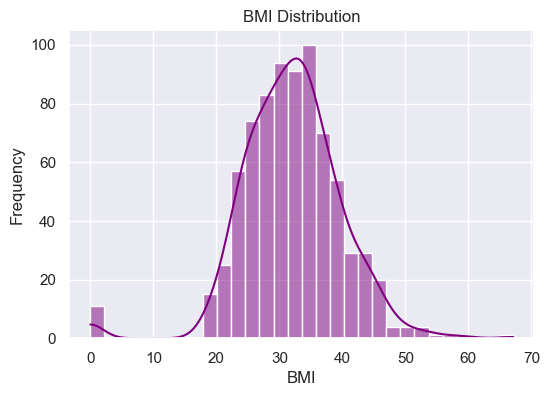

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the dataset due to execution environment reset
file_path = r'pima-data.csv'
data = pd.read_csv(file_path)

# Generating some specific plots for deeper insights

# 1. Distribution of Diabetes
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=data, color='blue')  # Blue color for the diabetes distribution plot
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# 2. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=30, kde=True, color='green')  # Green color for the age distribution plot
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Glucose Concentration Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['glucose_conc'], bins=30, kde=True, color='red')  # Red color for the glucose concentration plot
plt.title('Glucose Concentration Distribution')
plt.xlabel('Glucose Concentration')
plt.ylabel('Frequency')
plt.show()

# 4. BMI Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['bmi'], bins=30, kde=True, color='purple')  # Purple color for the BMI distribution plot
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


Here are the visual insights from the data:

1. **Distribution of Diabetes Cases**:
   - This plot shows the count of individuals with and without diabetes in the dataset. It highlights the proportion of diabetes cases compared to non-diabetes cases.

2. **Age Distribution**:
   - The age distribution is somewhat right-skewed, indicating a younger population. The majority of individuals are in their 20s to 30s.

3. **Glucose Concentration Distribution**:
   - The distribution of glucose concentration is approximately normal but slightly right-skewed. Most values cluster around the median, with fewer individuals having very high or very low glucose levels.

4. **BMI Distribution**:
   - The BMI distribution is also approximately normal, with most individuals having a BMI around 30. There is a slight right skew in the data, indicating a presence of individuals with higher BMI values.

These plots provide a visual understanding of the key variables in the dataset, particularly their distribution and relation to diabetes.

C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_box[i], colors_box[i]])
C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_box[i], colors_box[i]])
C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=var, dat

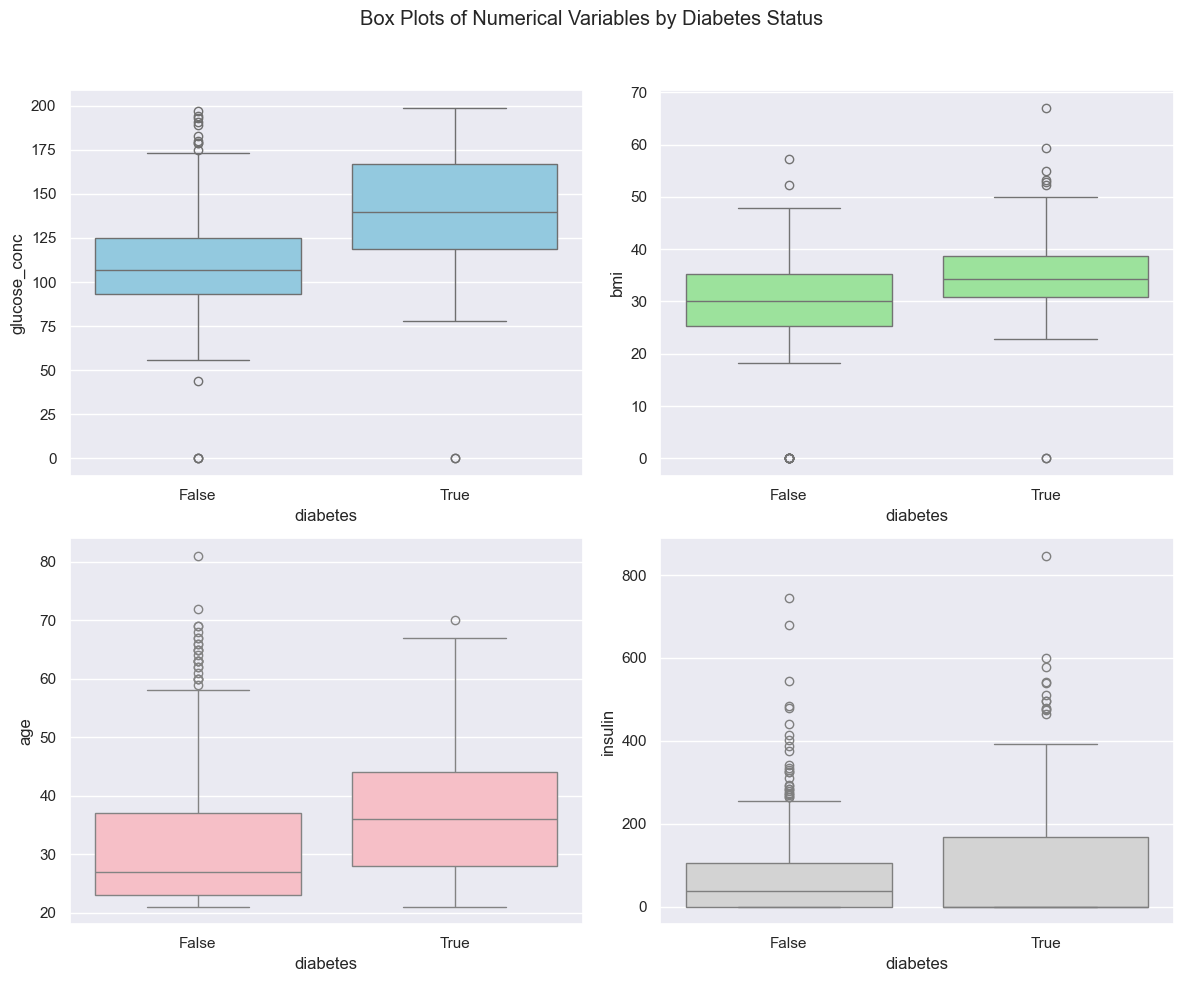

C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_violin[i], colors_violin[i]])
C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_violin[i], colors_violin[i]])
C:\Users\0591\AppData\Local\Temp\ipykernel_19376\2025448857.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='

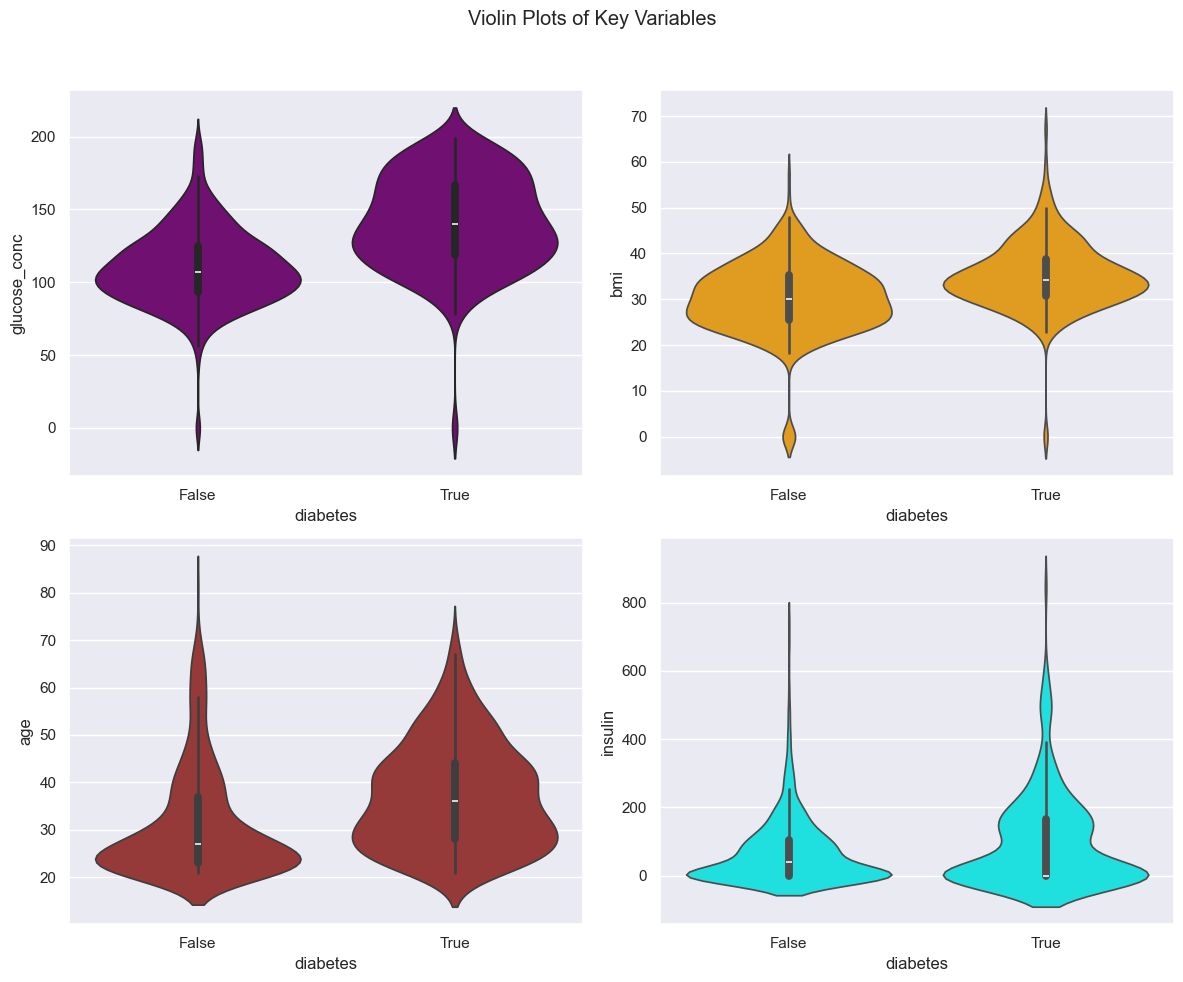

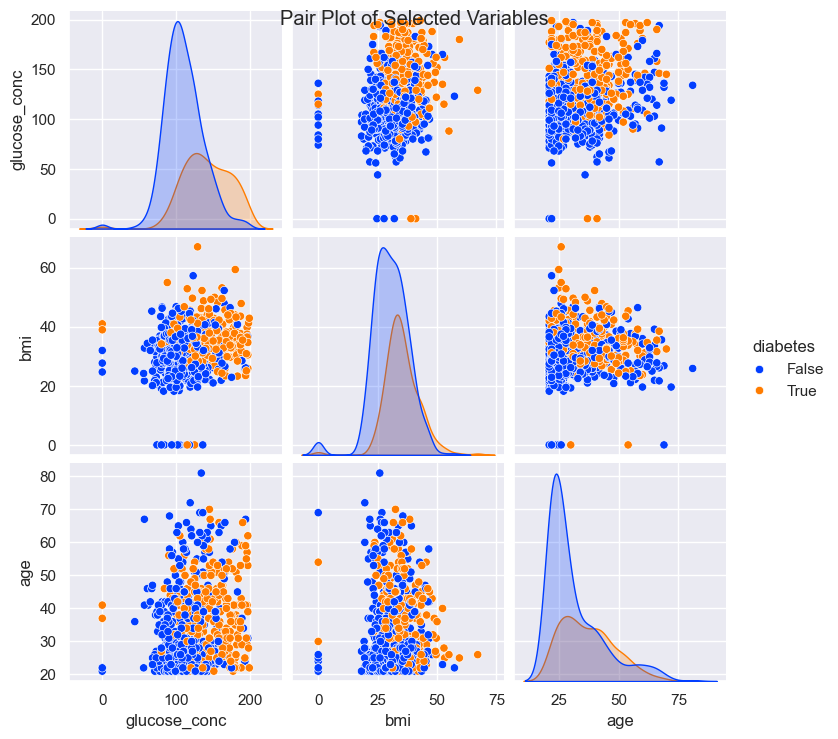

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r'pima-data.csv')

# Box Plots for Numerical Variables by Diabetes Status
numerical_variables = ['glucose_conc', 'bmi', 'age', 'insulin']
colors_box = ['skyblue', 'lightgreen', 'lightpink', 'lightgrey']  # Colors for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Box Plots of Numerical Variables by Diabetes Status')
for i, var in enumerate(numerical_variables):
    sns.boxplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_box[i], colors_box[i]])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Violin Plots for Key Variables
colors_violin = ['purple', 'orange', 'brown', 'cyan']  # Colors for violin plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Violin Plots of Key Variables')
for i, var in enumerate(numerical_variables):
    sns.violinplot(x='diabetes', y=var, data=data, ax=axes[i//2, i%2], palette=[colors_violin[i], colors_violin[i]])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Pair Plot
selected_variables = ['glucose_conc', 'bmi', 'age', 'diabetes']
sns.pairplot(data[selected_variables], hue='diabetes', palette='bright')  # Using a bright color palette for the pair plot
plt.suptitle('Pair Plot of Selected Variables')
plt.show()

Certainly, there are several other types of plots that can provide deeper insights into the dataset. Here are a few suggestions:

1. **Box Plots for Numerical Variables by Diabetes Status**:
   These plots can help you understand how different numerical variables (like glucose concentration, BMI, age) vary between diabetic and non-diabetic individuals.

2. **Violin Plots for Key Variables**:
   Similar to box plots, violin plots provide more information by showing the probability density of the data at different values.

3. **Pair Plot**:
   A pair plot can be useful to visualize the relationships between all pairs of variables. This is especially helpful for identifying patterns and correlations.

4. **Scatter Plots for Two Variables**:
   For example, plotting glucose concentration against BMI might reveal patterns related to diabetes.

5. **Count Plot for Number of Pregnancies**:
   This can show the distribution of the dataset across the number of pregnancies.

6. **Heatmap of Correlation Matrix**:
   Although you've already seen the correlation matrix, visualizing it as a heatmap can make it easier to interpret.

Let's generate a few of these plots for additional insights: Box Plots, Violin Plots, and a Pair Plot.

The additional plots provide further insights into the dataset:

1. **Box Plots of Numerical Variables by Diabetes Status**:
   - These plots compare the distributions of glucose concentration, BMI, age, and insulin levels between diabetic and non-diabetic individuals. They reveal differences in the medians and variances of these variables based on diabetes status.

2. **Violin Plots of Key Variables**:
   - Violin plots offer a deeper look by combining aspects of box plots and density plots. These plots show both the distribution of data points and their probability density. They provide a more nuanced view of how key variables vary with diabetes.

3. **Pair Plot of Selected Variables**:
   - The pair plot visualizes relationships between glucose concentration, BMI, and age, differentiated by diabetes status. It also includes scatter plots and histograms, allowing for a comprehensive view of correlations and distributions.

These plots are valuable for understanding the dataset's nuances, especially how different variables interact and their relationship with diabetes.

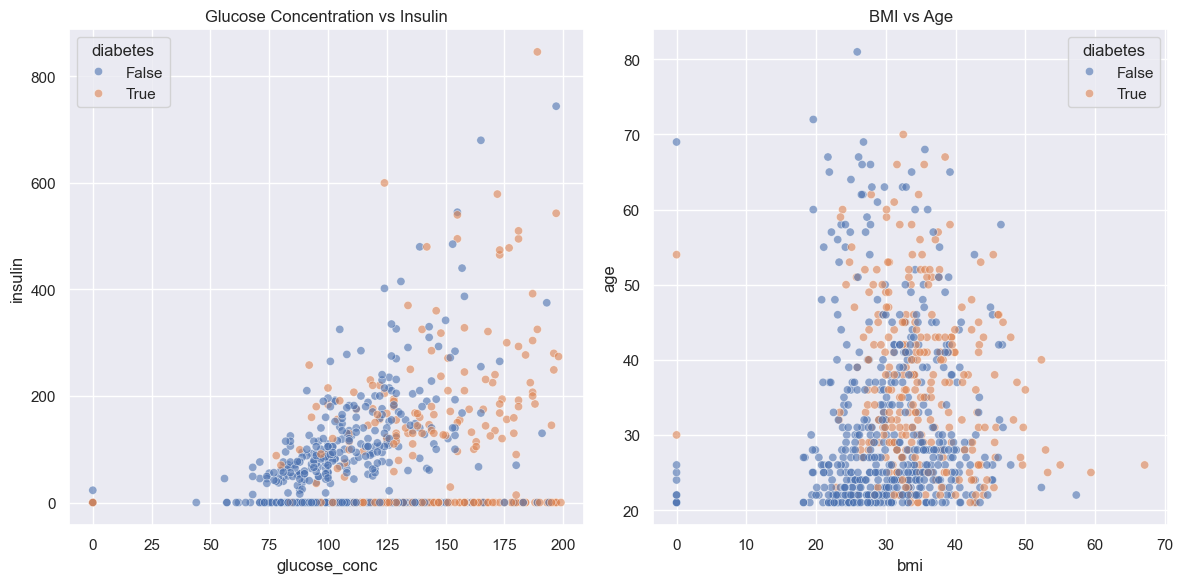

In [30]:
# Re-importing libraries and loading the data due to execution environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'pima-data.csv')

# Creating individual scatter plots for key variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='glucose_conc', y='insulin', data=data, hue='diabetes', alpha=0.6)
plt.title('Glucose Concentration vs Insulin')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='age', data=data, hue='diabetes', alpha=0.6)
plt.title('BMI vs Age')

plt.tight_layout()
plt.show()

Here are two individual scatter plots for key variables in the dataset:

1. **Glucose Concentration vs Insulin**:
   - This plot shows the relationship between glucose concentration and insulin levels, differentiated by diabetes status. It provides insights into how these two critical factors interact in diabetic versus non-diabetic individuals.

2. **BMI vs Age**:
   - This plot illustrates the relationship between BMI and age, again categorized by diabetes status. It helps in understanding how BMI varies with age in the context of diabetes.

These plots offer a clear visual representation of the relationships between these variables, highlighting patterns and potential correlations relevant to diabetes analysis.

C:\Users\0591\AppData\Local\Temp\ipykernel_19376\214061345.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='age', data=data, palette=[colors[0], colors[0]])
C:\Users\0591\AppData\Local\Temp\ipykernel_19376\214061345.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=data, palette=[colors[1], colors[1]])


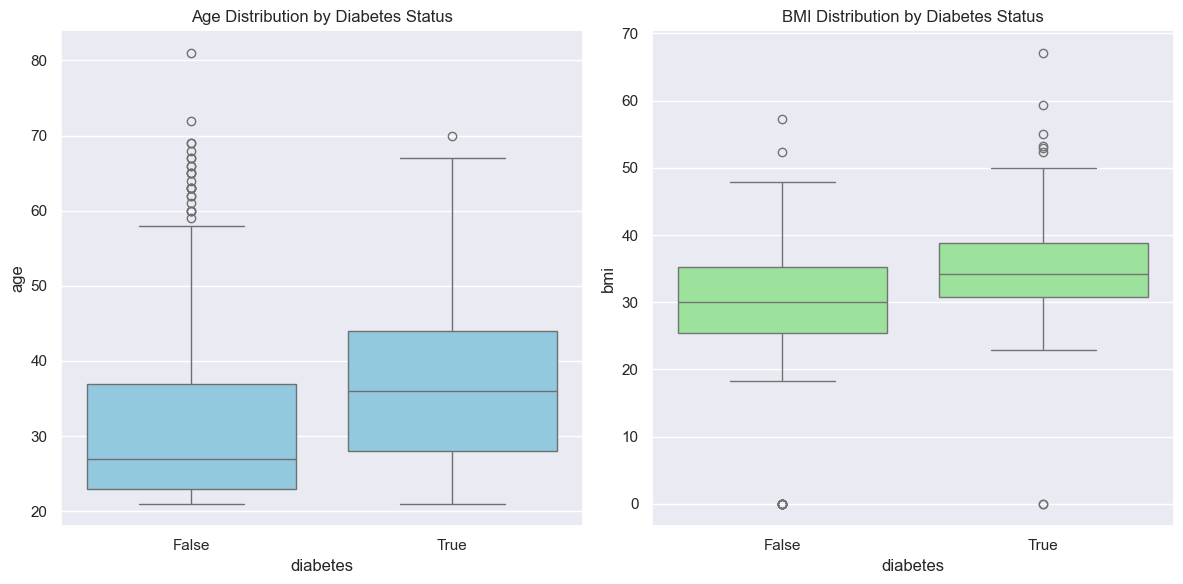

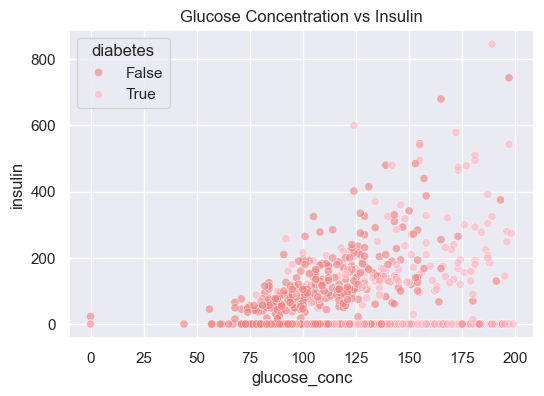

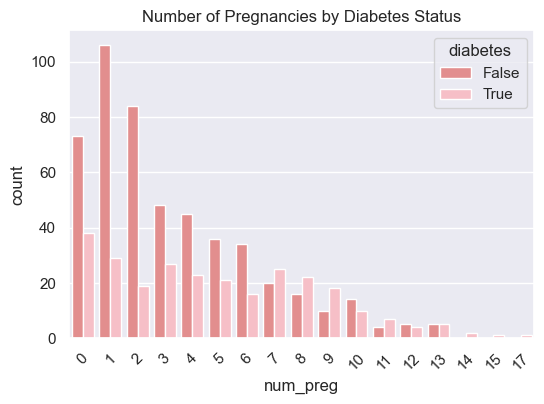

C:\Users\0591\AppData\Local\Temp\ipykernel_19376\214061345.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='diab_pred', data=data, palette=[colors[4], colors[4]])


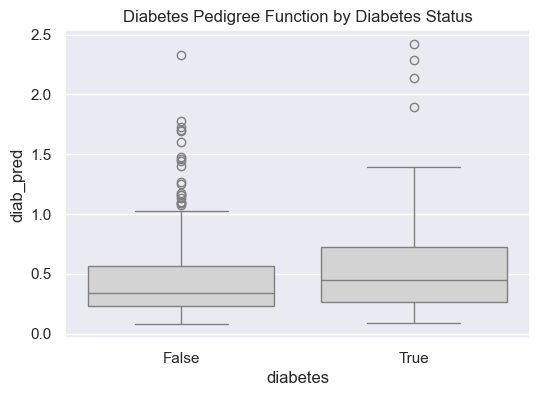

In [31]:
# Analyzing specific relationships and patterns in the data with different colors for each plot

# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r'pima-data.csv')

# Setting colors for each plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgrey']

# 1. Age and Diabetes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='diabetes', y='age', data=data, palette=[colors[0], colors[0]])
plt.title('Age Distribution by Diabetes Status')

# 2. BMI and Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='bmi', data=data, palette=[colors[1], colors[1]])
plt.title('BMI Distribution by Diabetes Status')

plt.tight_layout()
plt.show()

# 3. Insulin and Glucose Relationship
plt.figure(figsize=(6, 4))
sns.scatterplot(x='glucose_conc', y='insulin', data=data, hue='diabetes', alpha=0.6, palette=colors[2:4])
plt.title('Glucose Concentration vs Insulin')

plt.show()

# 4. Number of Pregnancies and Diabetes
plt.figure(figsize=(6, 4))
sns.countplot(x='num_preg', hue='diabetes', data=data, palette=colors[2:4])
plt.title('Number of Pregnancies by Diabetes Status')
plt.xticks(rotation=45)

plt.show()

# 5. Diabetes Pedigree Function
plt.figure(figsize=(6, 4))
sns.boxplot(x='diabetes', y='diab_pred', data=data, palette=[colors[4], colors[4]])
plt.title('Diabetes Pedigree Function by Diabetes Status')

plt.show()

1. **Age Distribution by Diabetes Status**: 
   - The box plot uses a sky blue color to differentiate between diabetic and non-diabetic individuals, illustrating the age distribution in each group.

2. **BMI Distribution by Diabetes Status**: 
   - This plot in light green color shows the BMI distribution for diabetic and non-diabetic groups, highlighting potential differences.

3. **Glucose Concentration vs Insulin**: 
   - The scatter plot, using shades of coral and pink, depicts the relationship between glucose concentration and insulin levels, with diabetes status as the hue.

4. **Number of Pregnancies by Diabetes Status**: 
   - The count plot, in the same coral and pink shades, shows the distribution of the number of pregnancies for diabetic and non-diabetic women.

5. **Diabetes Pedigree Function by Diabetes Status**: 
   - This box plot, in light grey, displays the distribution of the diabetes pedigree function, comparing diabetic and non-diabetic individuals.

In [32]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1.3790,True
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,1.1426,False
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,0.0000,True
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0.9062,False
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1.3790,True


In [33]:
le=LabelEncoder()
print(le)

LabelEncoder()
